In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from astropy.io import fits
from matplotlib import colors
from astropy.wcs import WCS

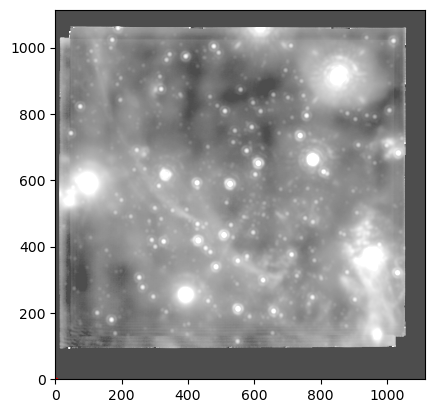

In [10]:
hdu_list = fits.open('/users/ava/Desktop/research/fits/mag20170716nirc2_lp.fits')
imgL = hdu_list[0].data
hdu_list[0].header

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [11]:
from astropy.io import fits

# Open the FITS file
hdul = fits.open('/users/ava/Desktop/research/fits/mag20170716nirc2_lp.fits')

# Get the image data and dimensions
image_data = hdul[0].data  # Assuming the image is in the primary HDU
rows, columns = image_data.shape

# Calculate the number of pixels
num_pixels = rows * columns

# Close the FITS file
hdul.close()

# Print the result
print(rows)
print(columns)
print(f"The FITS image contains {num_pixels} pixels.")

1115
1115
The FITS image contains 1243225 pixels.


In [12]:
filename =  '/users/ava/Desktop/research/lis/m20170716nirc2_lp_1_0.6_stf_cal.lis'
with open(filename) as f:
    for line in f:
        print(line)

       irs16C   8.285349  2017.539   527.14502   587.66602       15.56       1.00       108   24324000.000

      irs16NW   8.541349  2017.539   612.29199   649.91302       15.56       1.00       109   19219800.000

      irs16CC   9.265349  2017.539   427.67200   590.98102       15.56       1.00       108    9863690.000

       star_1   5.468349  2017.539   853.46600   911.66498       15.56       1.00       109  325575008.000

       star_2   5.882349  2017.539   394.48300   254.01601       15.56       1.00       109  222498000.000

       irs29N   6.568349  2017.539   776.99200   661.01300       15.56       1.00       109  118294000.000

       star_4   6.658349  2017.539   948.85797   374.44101       15.56       0.99       110  108822000.000

       star_5   7.046349  2017.539   616.80298  1067.09998       15.56       0.63         0   76146304.000

      irs16NE   7.598349  2017.539   332.50500   614.59399       15.56       1.00       108   45788800.000

       star_7   5.202349  20

4.9017398
6.248260200000001
5.8794898
5.2705102


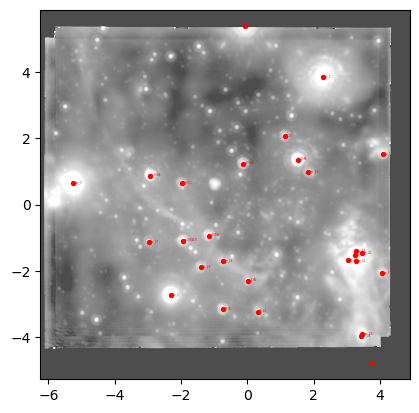

In [13]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

pixels = 1115

x_offset = 0.97681 / 0.01
y_offset = 0.60615 / 0.01

x_pos = 527.14502 + x_offset
y_pos = 587.66602 - y_offset

right_arc = (pixels - x_pos)*0.01
left_arc = x_pos*0.01
up_arc = (pixels - y_pos)*0.01
down_arc = y_pos*0.01

print(right_arc)
print(left_arc)
print(up_arc)
print(down_arc)

starpos = np.loadtxt('/users/ava/Desktop/research/lis/m20170716nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-left_arc, right_arc, -down_arc, up_arc], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/Desktop/research/lis/m20170716nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/Desktop/research/lis/m20170716nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 10:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0]-left_arc), (starpos_arcsec[i, 1]-down_arc), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]-left_arc, starpos_arcsec[i, 1]-down_arc], color='red', size=2)

plt.show()